In [7]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [33]:
#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Create dataset
X, y = make_blobs(n_samples=400, centers=centers, 
                  cluster_std=0.5, random_state=0)
#Normalize the values
X = StandardScaler().fit_transform(X)
X

array([[ 1.32983285, -0.34326857],
       [ 0.20932864, -0.93047362],
       [-1.02598175, -0.92265979],
       [-0.03329397,  1.94080822],
       [-0.26883597,  1.53557722],
       [-1.94194543, -0.78928203],
       [-1.47612407, -0.66991971],
       [ 0.58529331,  1.41725673],
       [ 0.8410827 , -0.97564115],
       [-0.27316054, -0.5074027 ],
       [ 1.05373167, -0.2836373 ],
       [ 1.39584466, -0.352409  ],
       [-0.46958958,  1.45692898],
       [-0.59428642, -0.61301392],
       [ 0.74377215, -0.5702478 ],
       [-1.33829602, -1.34892733],
       [-1.44843907, -0.89806959],
       [ 0.58998469,  1.41774688],
       [-0.53062231,  1.46452437],
       [-0.275122  ,  0.8531404 ],
       [ 0.72590932,  1.70468693],
       [ 1.42100542, -0.44337883],
       [ 0.8992293 , -1.03224517],
       [ 0.34694356, -0.65587388],
       [ 1.32313824, -0.75222648],
       [ 0.48925089,  1.53984879],
       [-1.01175005, -0.9233725 ],
       [ 0.70734531,  1.41716724],
       [-1.20159594,

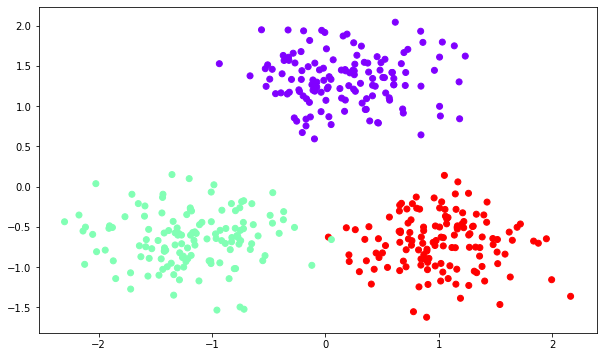

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')

In [27]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
#db.fit(X)


Text(0.5, 1.0, 'Agrupamentos determinados pelo DBSCAN')

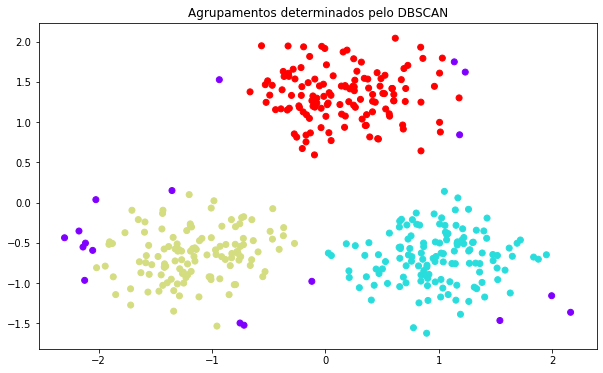

In [28]:
y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='rainbow')
plt.title("Agrupamentos determinados pelo DBSCAN")


In [12]:
#Apresenta o número de outliers
db.labels_[db.labels_ == -1].size 

18

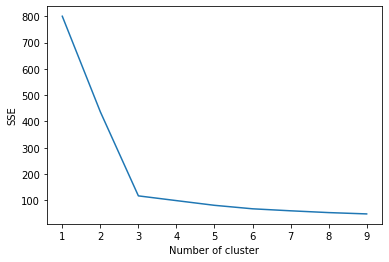

In [30]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [32]:
from sklearn import metrics

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    label = kmeans.labels_
    cal_haha = metrics.calinski_harabasz_score(X, label)
    print("Para k={}, o Calinski-Harabasz index é {}".format(k, cal_haha))

Para k=2, o Calinski-Harabasz index é 331.47127854498746
Para k=3, o Calinski-Harabasz index é 1161.2317784227812
Para k=4, o Calinski-Harabasz index é 937.3689562490697
Para k=5, o Calinski-Harabasz index é 878.1540072248764
Para k=6, o Calinski-Harabasz index é 853.4667762730935
Para k=7, o Calinski-Harabasz index é 795.3873572012271
Para k=8, o Calinski-Harabasz index é 786.1738446281538
Para k=9, o Calinski-Harabasz index é 765.1479703289453
Para k=10, o Calinski-Harabasz index é 750.8427676094599


In [34]:
kmeans = KMeans(n_clusters=3) # Objetiva agrupar o conjunto em 2 grupos: Sobrevientes (Survived) ou Não Sobreviventes (Not survived)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)